In [1]:
#  import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


In [2]:
# Read the data from file Visadataset.csv
file_path = r"Visadataset.csv"     # Visadataset.csv is available in same folder
visa_df = pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
# Divide the data into Categorical and numerical columns

visa_dict = dict(visa_df.dtypes)
cat_col_df = [i for i,j in visa_dict.items() if j=='object']
print(cat_col_df)
num_col_df = [i for i,j in visa_dict.items() if j!='object']
print(num_col_df)

['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']
['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [4]:
#  Divide the data into Categorical and numerical - Method 2
visa_dict = dict(visa_df.dtypes)
cat_col_df = [i for i in visa_dict.keys() if visa_dict[i]=='object']
print(cat_col_df)
num_col_df = [i for i in visa_dict.keys() if visa_dict[i]!='object']
print(num_col_df)

['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']
['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [5]:
#  Divide the data into Categorical and numerical - Method 3 - direct method 'select_dtypes'
cat_col_df = visa_df.select_dtypes(include='object').columns
num_col_df = visa_df.select_dtypes(exclude='object').columns
print(cat_col_df)
print(num_col_df)

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')
Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')


In [6]:
#  Select a specific column from dataset - Method1
visa_df.take([1],axis=1)     # TO use take(), we need to remember column index of a column 
#  Select a specific column from dataset - Method2
visa_df['continent']        # Returns Series type
#  Select a specific column from dataset - Method3
visa_df[['continent']]        # Returns DataFrame
#  Select a specific column from dataset - Method4
visa_df.continent       # Returns Series type
#  Select a specific column from dataset - Method5
visa_df.loc[:,'continent']

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

In [10]:
#  Read multiple columns 
# Keep the required columns in a list, and Pass that list
cols = ['continent', 'education_of_employee']
visa_df[cols]

,continent,education_of_employee
0,Asia,High School
1,Asia,Master's
2,Asia,Bachelor's
3,Asia,Bachelor's
4,Africa,Master's
...,...,...
25475,Asia,Bachelor's
25476,Asia,High School
25477,Asia,Master's
25478,Asia,Master's


- Unique(): Unique() will provide number of unique items in a particular column

In [11]:
#  Read the required column
visa_df['continent'].unique() # It returns array type of unique values

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [12]:
len(visa_df['continent'].unique()) # Length of unique values in array

6

In [13]:
visa_df['continent'].nunique()  # Gives count of unique items

6

#### Difference between len() and .nunique():
- len() - inbuilt function
- .nunique() - method name in a package

#### Task 1:  Find the number of applicants by Continentwise.
#### Ex: In continent 'Asia' - Number of applicants out of total (25480) applicants

- Read the data from dataset
- Apply the condition - When apply the condition, python returns True or False
- Inorder to retrieve the True data, syntax: DatFrame_name[ < condition > ]

In [14]:
#  Read the continent column data which are from 'Asia'
con = visa_df['continent']=='Asia'         # condition
visa_df[con]                               # DatFrame_name[<condition>]
len(visa_df[con])

# Number of applicants from 'Asia" continent
# len(visa_df[visa_df['continent']=='Asia'])  # Can write in single column

16861

In [19]:
# Number of applicants from each continent

visa_df['continent'].unique()   # Unique continents
print(len(visa_df[visa_df['continent'] == 'Asia']))
print(len(visa_df[visa_df['continent'] == 'Africa']))
print(len(visa_df[visa_df['continent'] == 'North America']))
print(len(visa_df[visa_df['continent'] == 'Europe']))
print(len(visa_df[visa_df['continent'] == 'South America']))
print(len(visa_df[visa_df['continent'] == 'Oceania']))

16861
551
3292
3732
852
192


In [20]:
#  Above all lines using for loop
for i in visa_df['continent'].unique():
    con = visa_df['continent']==i
    print(f'Number of applicants in continent {i}  = {len(visa_df[con])}')

Number of applicants in continent Asia  = 16861
Number of applicants in continent Africa  = 551
Number of applicants in continent North America  = 3292
Number of applicants in continent Europe  = 3732
Number of applicants in continent South America  = 852
Number of applicants in continent Oceania  = 192


#### Task 2

- Instead of print count of applicants, create empy list
- Save the count of applicants in empty list
- We already have unique continent list
- Create dataframe with 2 lists (continents, count of applicants)

In [21]:
continent_list = visa_df['continent'].unique()
count_list = []
for i in visa_df['continent'].unique():
    con = visa_df['continent']==i  
    count_list.append(len(visa_df[con]))
continent_df = pd.DataFrame(zip(continent_list,count_list),columns=['Continent','Number of Applicants'])
continent_df

,Continent,Number of Applicants
0,Asia,16861
1,Africa,551
2,North America,3292
3,Europe,3732
4,South America,852
5,Oceania,192


In [22]:
#  SAve the above DatFrame in to a file
continent_df.to_csv("Continents.csv",index=False)

#### value_counts()

In [7]:
# Single line code to get count based on 'Continent'
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [8]:
cdf = visa_df['continent'].value_counts()
print("=========Frequency Table=============")
cdf

=========Frequency Table=============


continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [27]:
dir(cdf)

['Africa',
 'Asia',
 'Europe',
 'Oceania',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__

In [32]:
cdf_items = cdf.items()
for i in cdf_items:
    print(i)

('Asia', 16861)
('Europe', 3732)
('North America', 3292)
('South America', 852)
('Africa', 551)
('Oceania', 192)


In [29]:
cdf.keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [33]:
cdf.values

array([16861,  3732,  3292,   852,   551,   192], dtype=int64)

In [39]:
#  Create a DataFrame using keys and values of cdf
keys_list = cdf.keys()
values_list = cdf.values
cols = ['Labels','Count']
cdf_df = pd.DataFrame(zip(keys_list,values_list),columns=cols)
cdf_df.to_csv("Continent.csv",index=False)

#### normalize

- Realtive Frequency Table
- It returns percentage of lables of column data

In [9]:
cdf = visa_df['continent'].value_counts(normalize=True)    #Return proportions rather than frequencies.
print("=========Relative Frequency Table=============")
cdf

=========Relative Frequency Table=============


continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64

#### Bar chart

- Bar chart is a graphical representation of the Frequency table
- Bar graph is a plot between Count and Class
- We required 2 columns to create Bar chart:
  - Categorical column
  - Numerical column
- We already have frequency table for each categorical column.
   - Ex: "Continents.csv". It has 2 columns: **"Continent"** (Categorical column) and **"Number of Applicants"** (Numerical column)
- We use package **matplotlib**

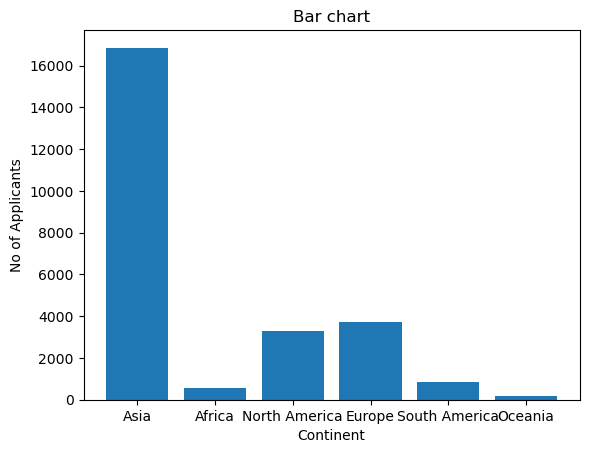

In [65]:
import matplotlib.pyplot as plt
plt.bar('Continent',     # x- axis (width)
        'Number of Applicants',  # y-axis (height)
        data=continent_df        # DataFrame name
       )
plt.title("Bar chart")
plt.xlabel("Continent")
plt.ylabel("No of Applicants")
plt.show()       # show() will avoid the write up. It should be last line for a Bar chart

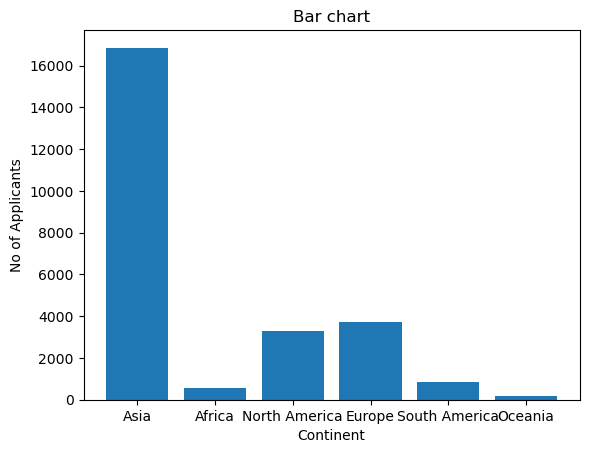

In [72]:
# Save Bar chart

plt.bar('Continent',     # x- axis (width)
        'Number of Applicants',  # y-axis (height)
        data=continent_df        # DataFrame name
       )
plt.title("Bar chart")
plt.xlabel("Continent")
plt.ylabel("No of Applicants")

plt.savefig("Continents_Bar_Chart.png")

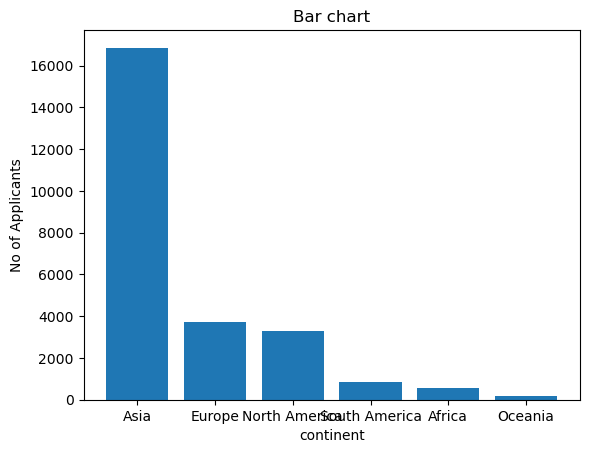

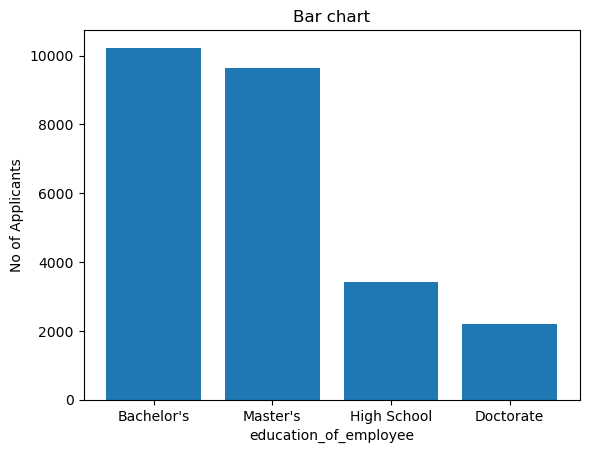

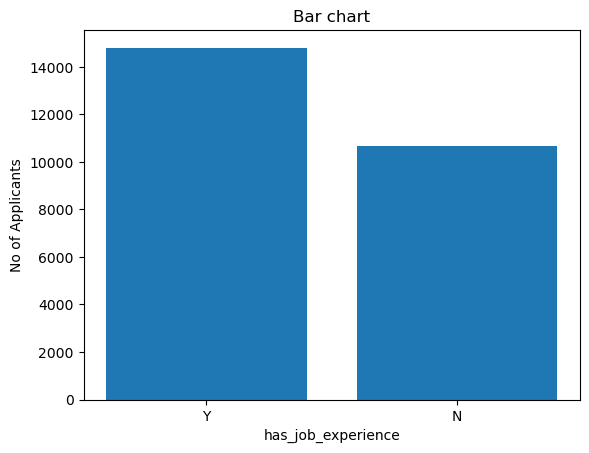

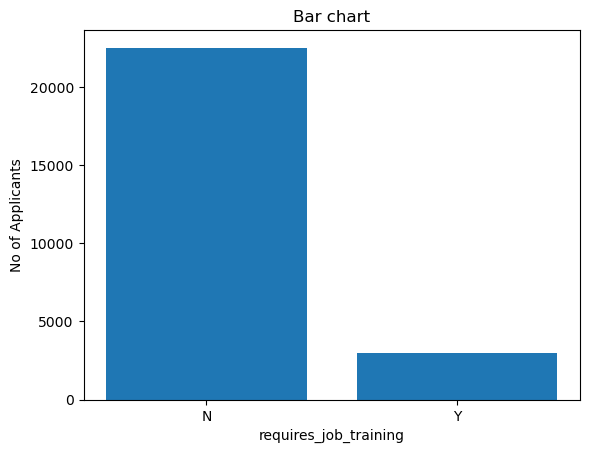

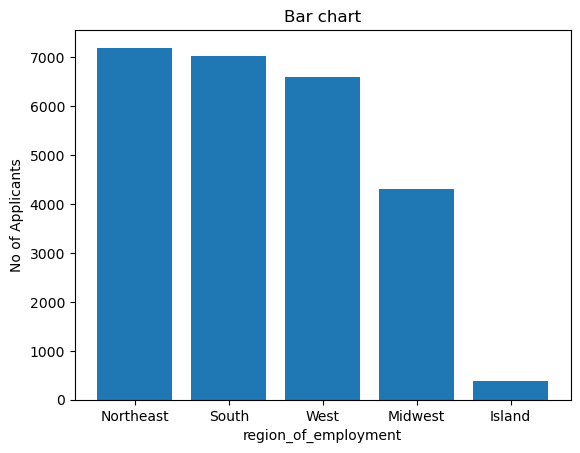

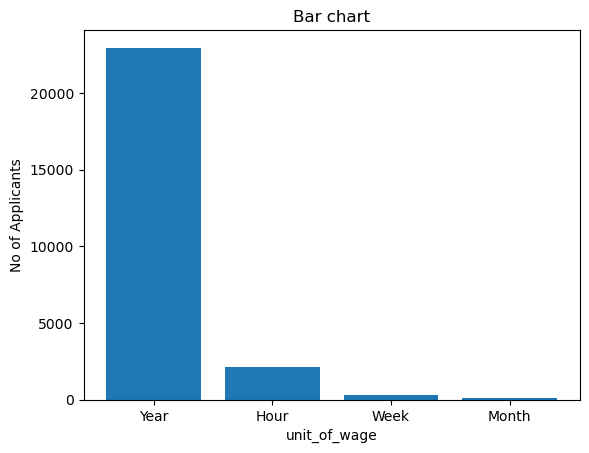

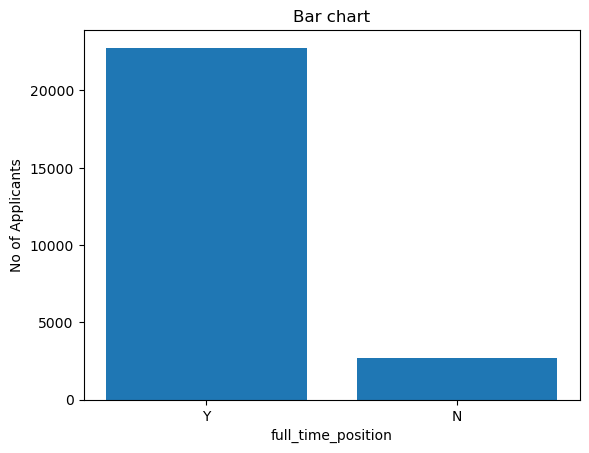

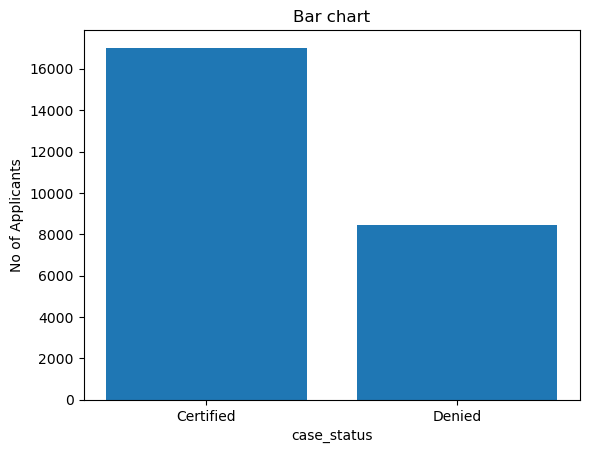

In [57]:
# Save 8 Bar charts for 8 categorical columns using for loop

for i in range(1,len(cat_col_df)):
    cdf = visa_df[cat_col_df[i]].value_counts()
    keys_list = cdf.keys()
    values_list = cdf.values
    cols = ['Labels','Count']
    cdf_df = pd.DataFrame(zip(keys_list,values_list),columns=cols)
    plt.bar('Labels',     # x- axis (width)
            'Count',  # y-axis (height)
            data = cdf_df       # DataFrame 
           )
    plt.title("Bar chart")
    plt.xlabel(cat_col_df[i])
    plt.ylabel("No of Applicants")   
    plt.savefig(cat_col_df[i]+"_Bar_Chart.png")
    plt.show()

#### Bar plot using Seaborn

- countplot() - is used for plot
- In matplotlib:
   - we will take raw data
   - Create Frequency table (i.e. Dataframe)
   - Use column names of Frequency table and plot using barplot()

- In seaborn:
   - take raw data
   - Provide direct Column name
   - Provide direct DataFrame name

In [20]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

<Axes: xlabel='case_status', ylabel='count'>

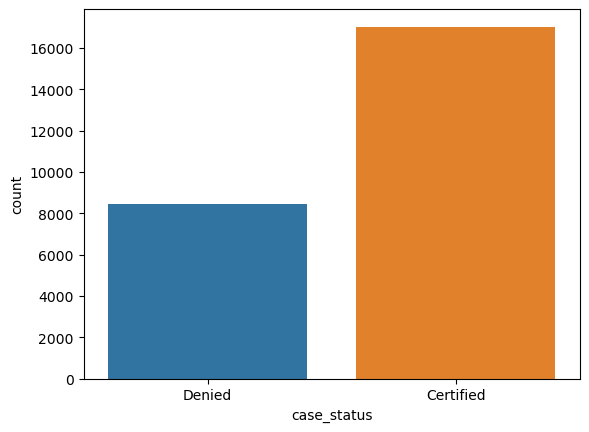

In [3]:
import seaborn as sbn

sbn.countplot(
    x= 'case_status',
    data = visa_df
)

<Axes: xlabel='case_status', ylabel='count'>

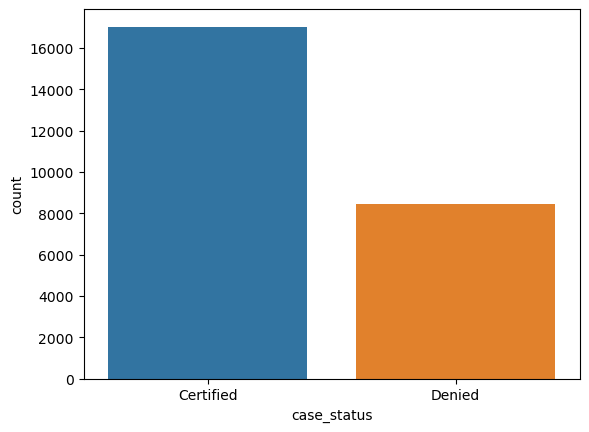

In [26]:
sbn.countplot(
    x = 'case_status',
    data = visa_df,
    order = ['Certified','Denied']
)

In [4]:
visa_df['continent'].value_counts().keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

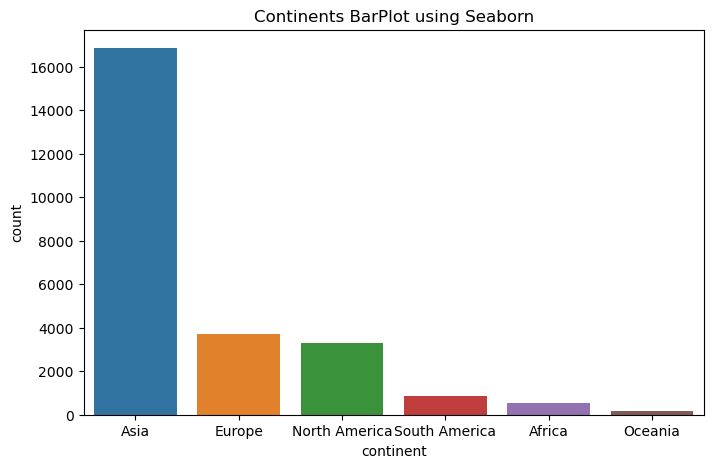

In [5]:
import seaborn as sns
plt.figure(figsize=(8,5))  # 8 units - X axis,  5 units- Y axis

# order_continents = ['Asia', 'Europe', 'North America', 'South America', 'Africa','Oceania']
order_continents = visa_df['continent'].value_counts().keys()

sns.countplot(data = visa_df,
             x= 'continent',
             order = order_continents)
plt.title('Continents BarPlot using Seaborn')
plt.savefig('Continents_barplot_seaborn.jpg')
plt.show()

#### TASK3:

- Using for loop, plot Bar chart for all the cateorical columns
- Use seaborn and matplotlib packages
- seaborn - countplot() - Raw data. Direct column name.
- matplotlib - Raw data. Use value_counts() to get keys and values lists. Create data frame with the keys and values.

In [33]:
import os
os.getcwd()

'C:\\Users\\HP\\Documents\\DataScience_AI_Naresh IT\\EDA'

In [34]:
# Create subfolder "Graphs_seaborn" inside "EDA" folder - Method 1
os.makedirs("Graphs_seaborn")

In [42]:
# Create subfolder "Graphs_seaborn" inside "EDA" folder - Method 2
root_directory = os.getcwd()

new_folder = 'graphs_seaborn1'

new_dir = os.path.join(root_directory,new_folder)

os.makedirs(new_dir)

In [46]:
# Create subfolder "Graphs_seaborn" inside "EDA" folder - Method 3 - with try and exception
try:
    root_directory = os.getcwd()
    new_folder = 'graphs_seaborn1'
    new_dir = os.path.join(root_directory,new_folder)
    os.makedirs(new_dir)
except Exception as e:
    print('Directory is available already')

Directory is available already


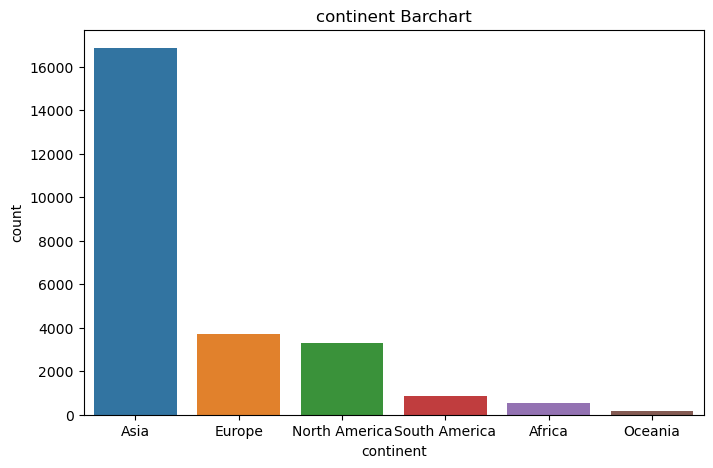

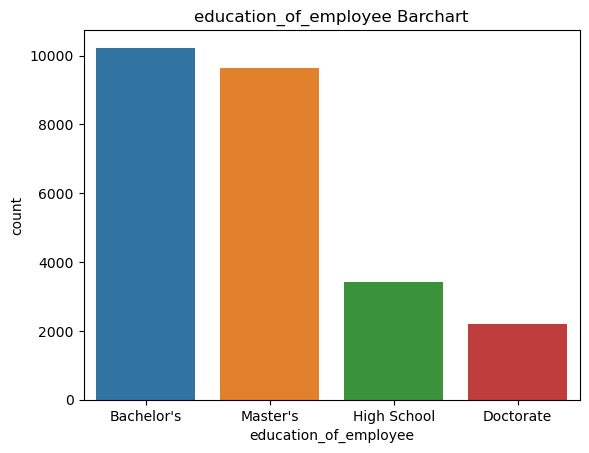

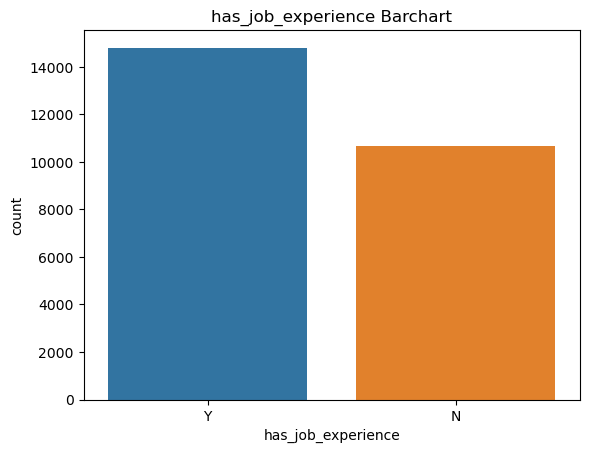

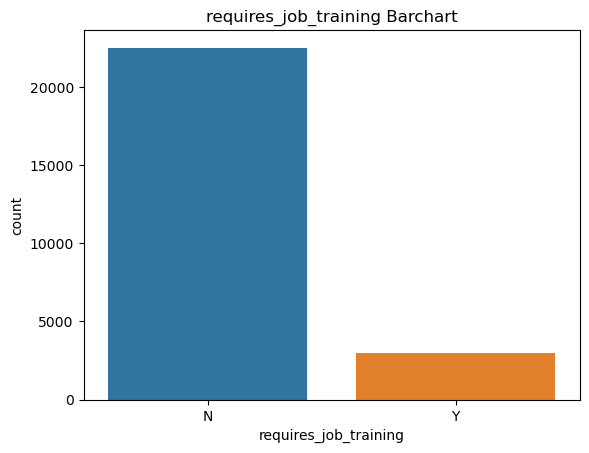

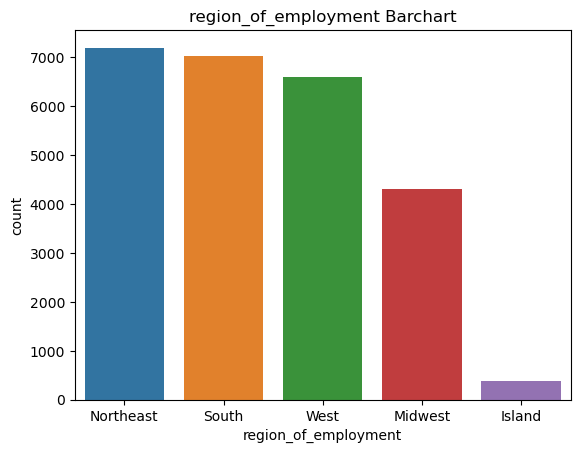

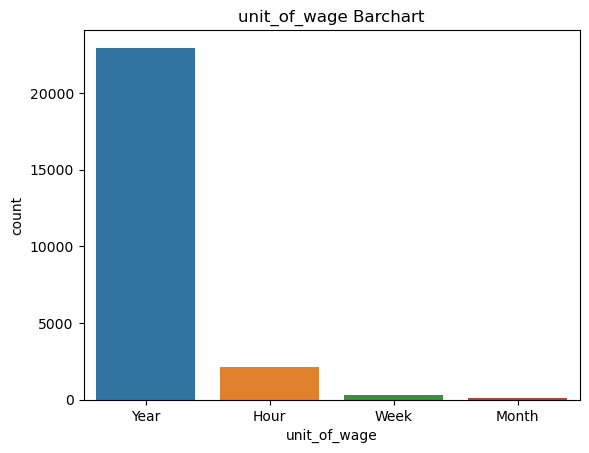

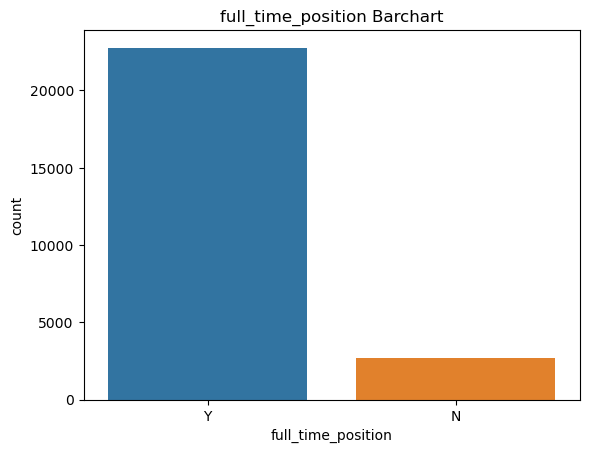

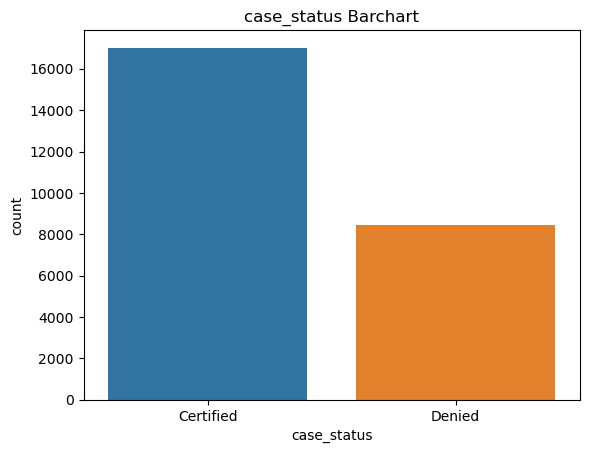

In [72]:
# Create Barplots for all Categorical columns using matplotlib
#  Already DataFrames are avaialble for each Categorical column (in the same path)

cat_col_list = visa_df.select_dtypes(include='object').columns
plt.figure(figsize=(8,5))
for i in cat_col_list[1:]:
    order_cols = visa_df[i].value_counts().keys()
    sbn.countplot(data = visa_df,
             x = i,
             order = order_cols)
    plt.title(i+" Barchart")
    plt.savefig("Graphs_seaborn\\"+i+".jpg")
    plt.show()

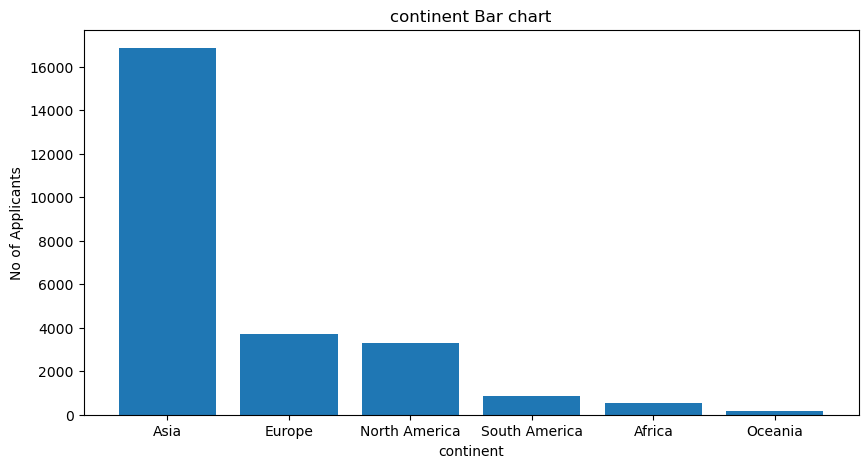

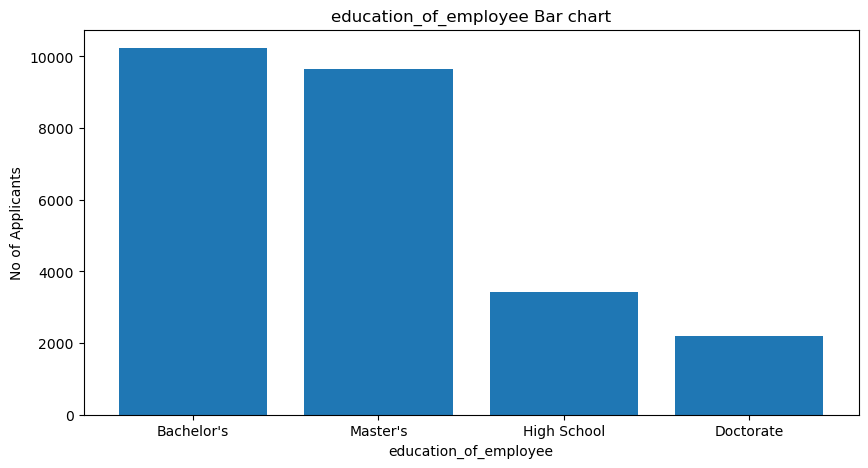

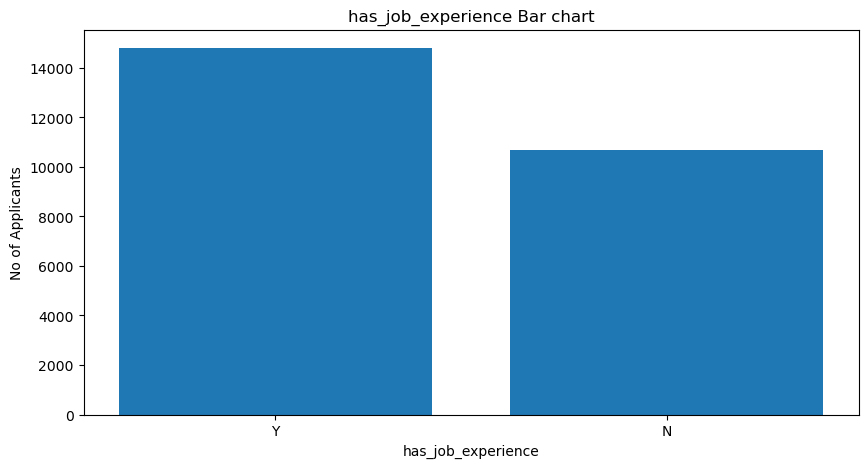

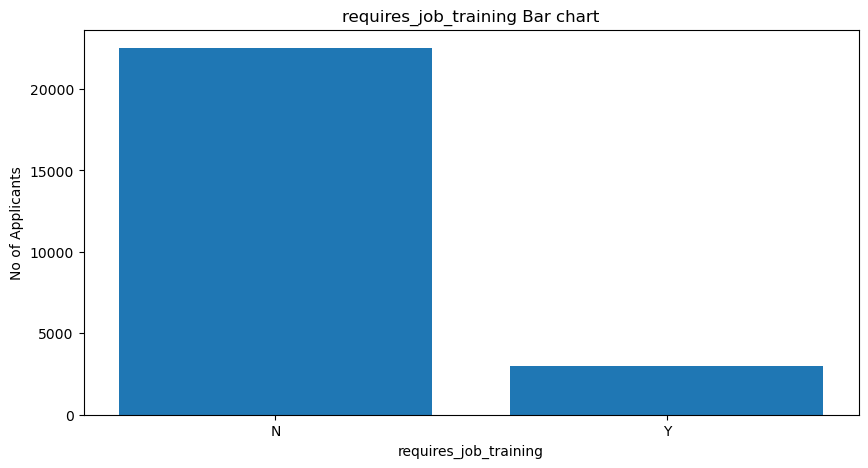

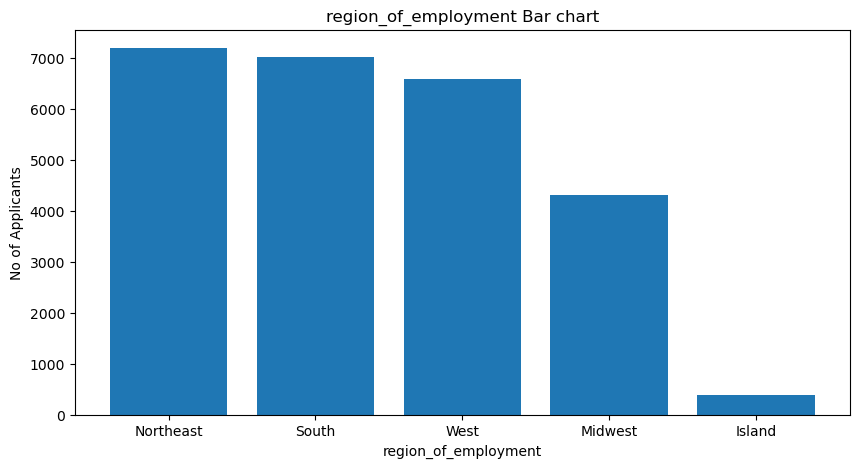

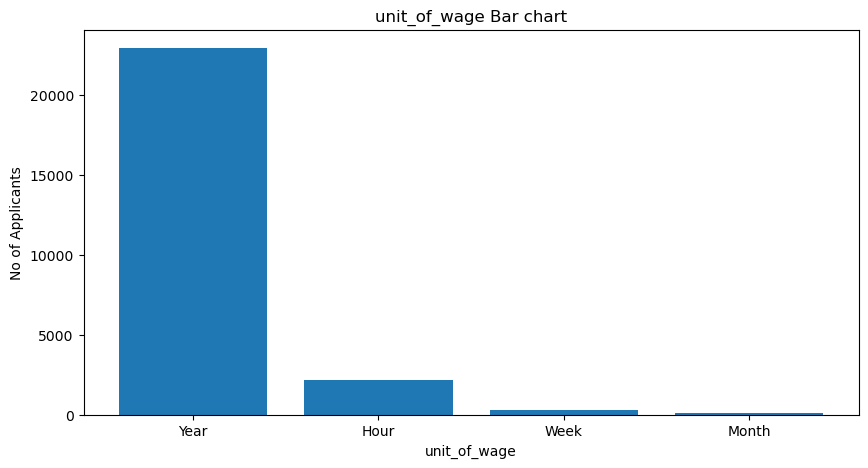

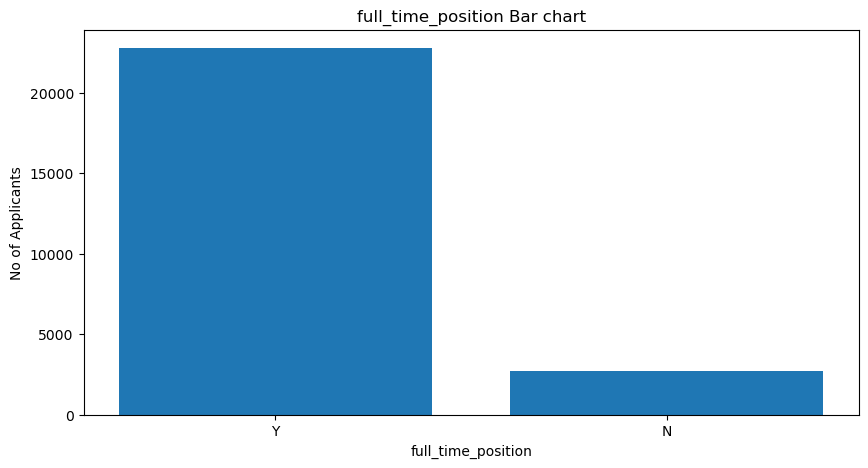

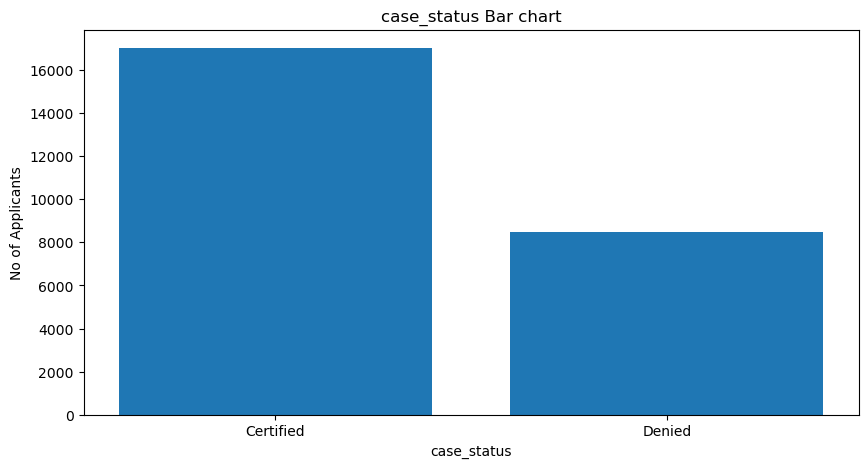

In [10]:
# Save 8 Bar charts for 8 categorical columns using for loop
cat_col_df = visa_df.select_dtypes(include='object').columns
for i in cat_col_df[1:]:
    cdf_df = pd.read_csv(i+".csv")
    plt.figure(figsize=(10,5))
    plt.bar('Labels',     # x- axis (width)
            'Count',  # y-axis (height)
            data = cdf_df
           )
    plt.title(i+" Bar chart")
    plt.xlabel(i)
    plt.ylabel("No of Applicants")   
    plt.savefig("Graphs_seaborn\\"+i+"_Bar_Chart.png")
    plt.show()

In [73]:
os.listdir()

['.ipynb_checkpoints',
 'bank.csv',
 'CaseStatusBarPlot.png',
 'CaseStatusBarPlot1.png',
 'case_status.csv',
 'case_status.ipynb',
 'case_status_Barplot.ipynb',
 'case_status_Bar_Chart.png',
 'case_status_frq_table.ipynb',
 'CategoricalColumns.CSV',
 'contact.csv',
 'contact.png',
 'Continent.csv',
 'Continents.csv',
 'Continents_barplot_seaborn.jpg',
 'Continents_barplot_seaborn.png',
 'Continents_Bar_Chart.png',
 'continent_Bar_Chart.png',
 'default.csv',
 'default.png',
 'EDA_Assignment2_NumpyPDF.ipynb',
 'EDA_Practice_BankDataset.ipynb',
 'EDA_Session1.ipynb',
 'EDA_Session2_Basic_Operations_On_Visa.ipynb',
 'EDA_Session2_Scrapping.ipynb',
 'EDA_Session3_CategoricalColumnAnalysis.ipynb',
 'education.csv',
 'education.png',
 'education_of_employee.csv',
 'education_of_employee_Bar_Chart.png',
 'full_time_position.csv',
 'full_time_position_Bar_Chart.png',
 'Graphs_seaborn',
 'graphs_seaborn1',
 'has_job_experience.csv',
 'has_job_experience_Bar_Chart.png',
 'housing.csv',
 'housing.

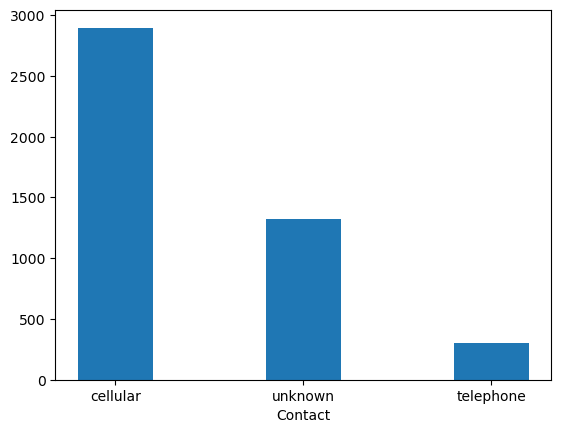

In [22]:
# Explore arguments in plt.bar()
df = pd.read_csv("contact.csv")
plt.bar('Labels',  # X axis
        'Data',    # Y axis means - Height 
        0.4,       # Width of each bar
        data=df)   # DatFarme name 
plt.xlabel("Contact")
plt.show()

#### Subplots

- If we have multiple plots using for loop, then plots are showing one by one
- It is hard to see all of the graphs
- Subplots - is a kind of MAtrix representation
  
- Suppose we have 2*2 matrix - means 4 plots we can plot
- First plot position representaion :  (2,2,1)
- Second plot position representaion :  (2,2,2)
- Third plot position representaion :  (2,2,3)
- Fourth plot position representaion :  (2,2,4)

- Suppose we have 3*3 matrix - means 9 plots we can plot
- First plot position representaion :  (3,3,1)
- Second plot position representaion :  (3,3,2)
- and so on

- 

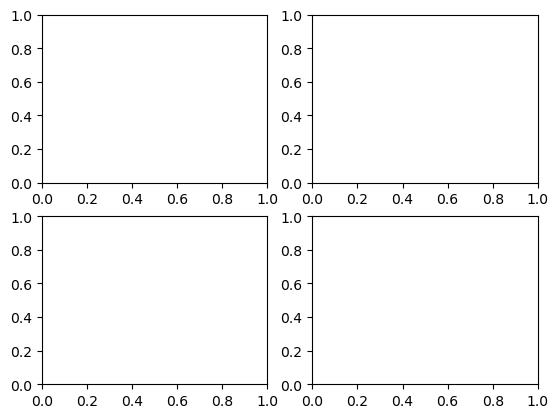

In [36]:
# plt.subplot(2,2,1)
# plt.subplot(2,2,2)
# plt.subplot(2,2,3)
# plt.subplot(2,2,4)
# plt.show()

for i in range(1,5):
    plt.subplot(2,2,i)
plt.show()

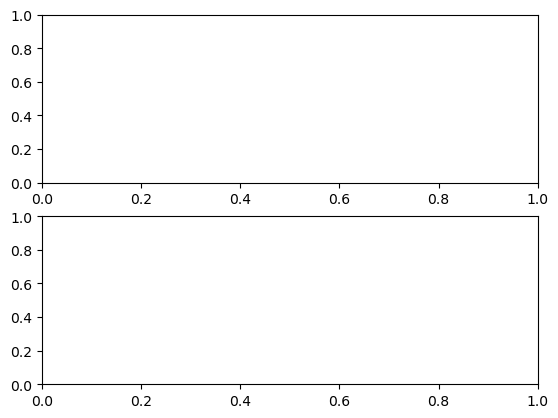

In [32]:
plt.subplot(2,1,1)
plt.subplot(2,1,2)
plt.show()

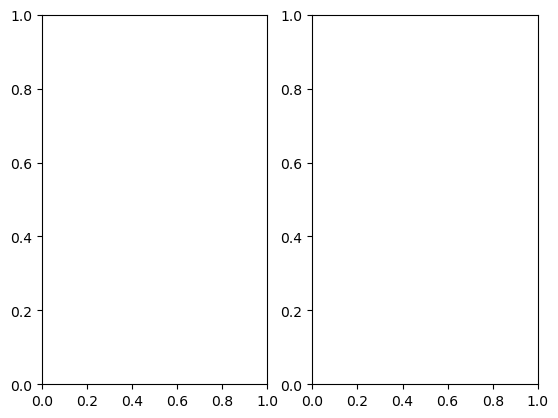

In [33]:
plt.subplot(1,2,1)
plt.subplot(1,2,2)
plt.show()

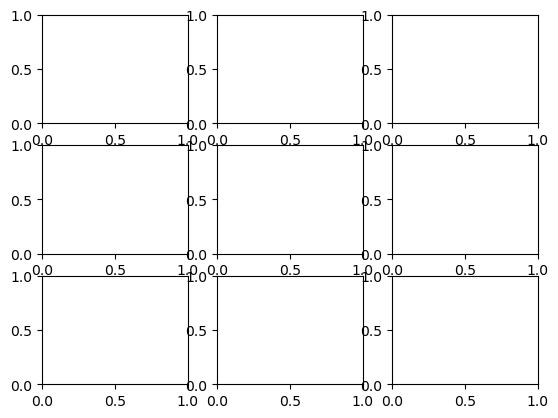

In [37]:
for i in range(1,10):
    plt.subplot(3,3,i)
plt.show()

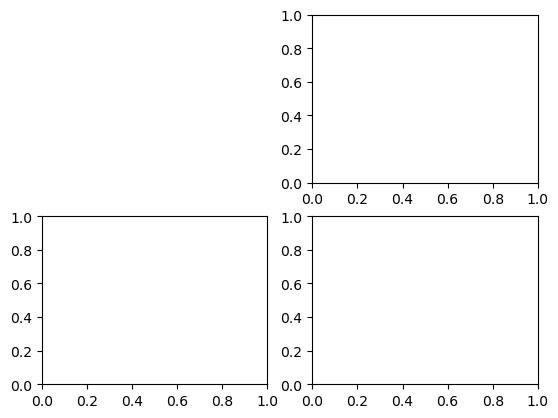

In [38]:
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)
plt.show()

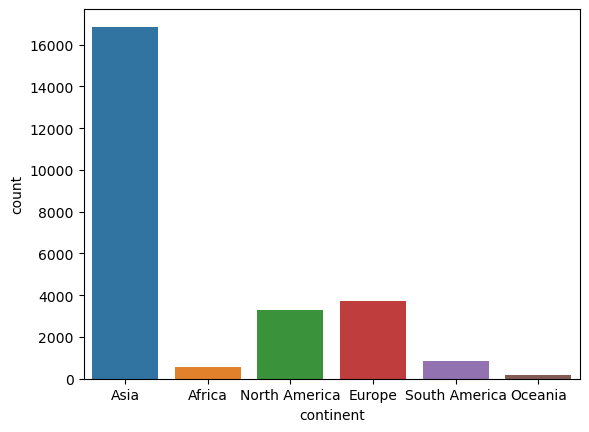

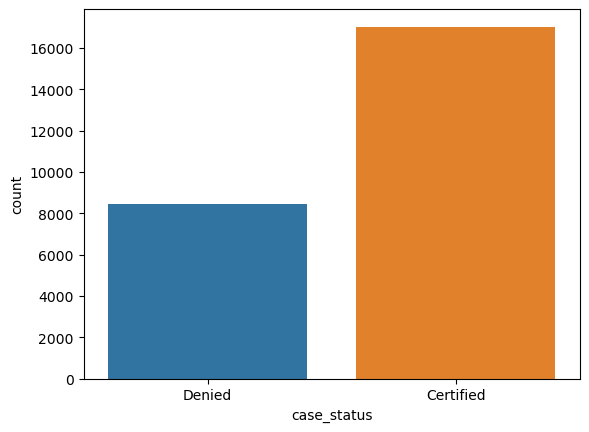

In [46]:
# Read the visadataset
# Take 2 columns: continent, case_status
# Draw 2 plots separately
visa_df = pd.read_csv(f"Visadataset.csv")
sbn.countplot(x='continent',data = visa_df)
plt.show()
sbn.countplot(x='case_status',data = visa_df)
plt.show()

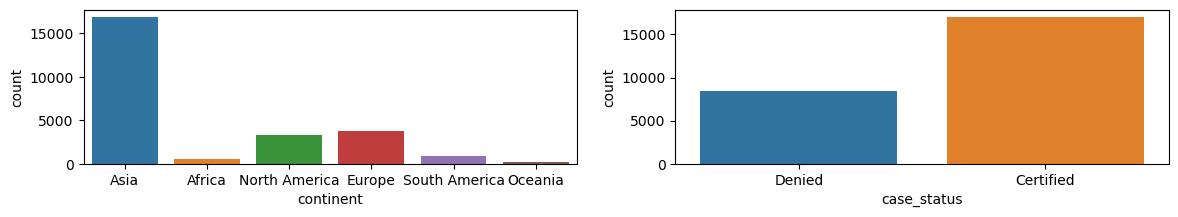

In [53]:
# Read the visadataset
# Take 2 columns: continent, case_status
# Draw 2 plots as a matrix using subplot
visa_df = pd.read_csv(f"Visadataset.csv")
plot_cols = ['continent','case_status']
plt.figure(figsize=(14,2))
for i in range(len(plot_cols)):
    plt.subplot(1,2,i+1)
    sbn.countplot(x=plot_cols[i],data = visa_df)
plt.show()

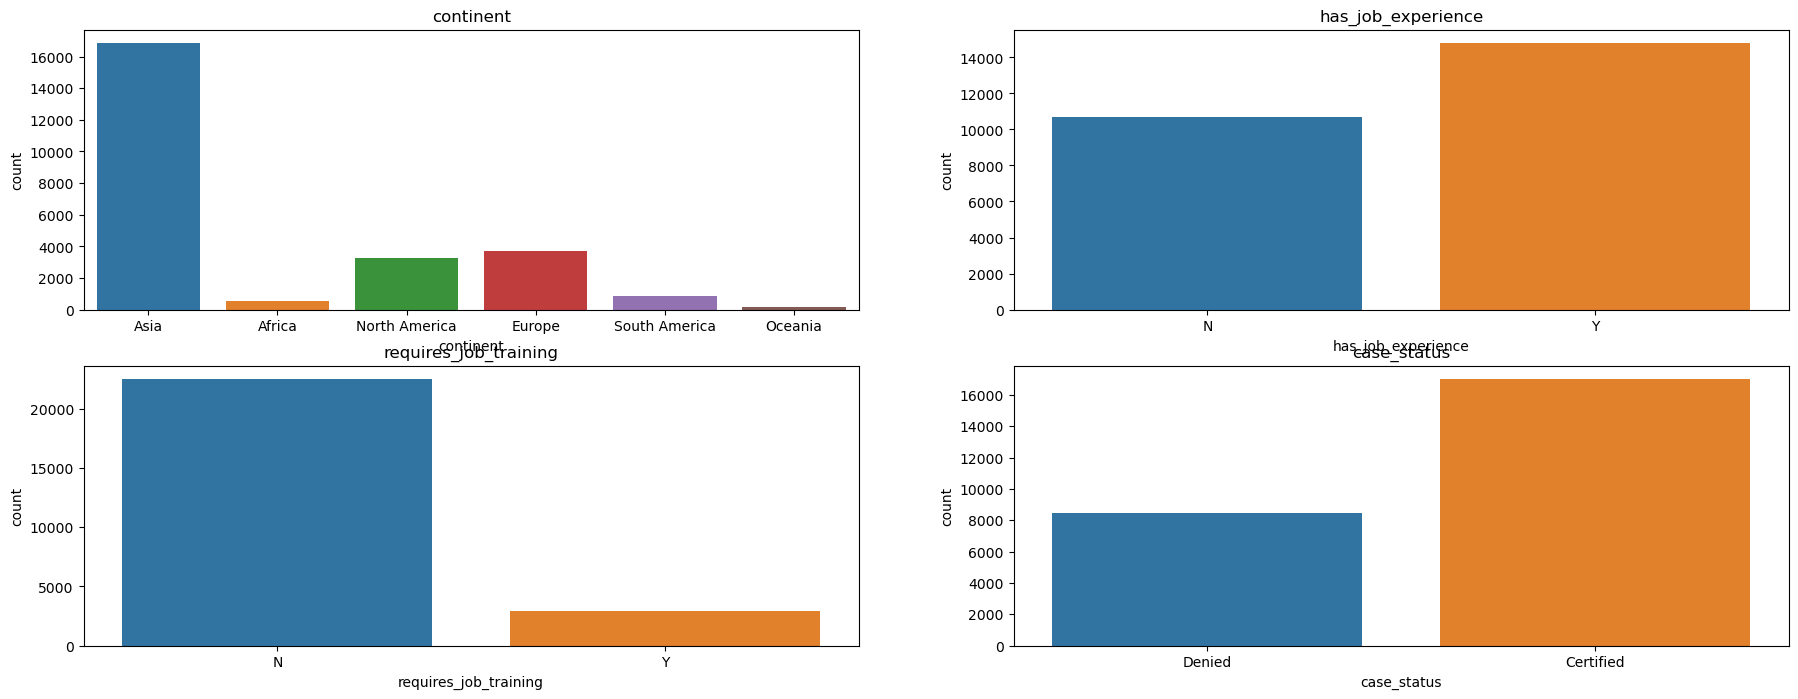

In [94]:
# Plot the 4 plots : 'continent','has_job_experience','requires_job_training','case_status'

plot_cols = ['continent','has_job_experience','requires_job_training','case_status']
plt.figure(figsize=(22,8))
for i in range(len(plot_cols)):
    plt.subplot(2,2,i+1)
    sbn.countplot(x=plot_cols[i],data = visa_df)
    plt.title(plot_cols[i]+"")
plt.show()

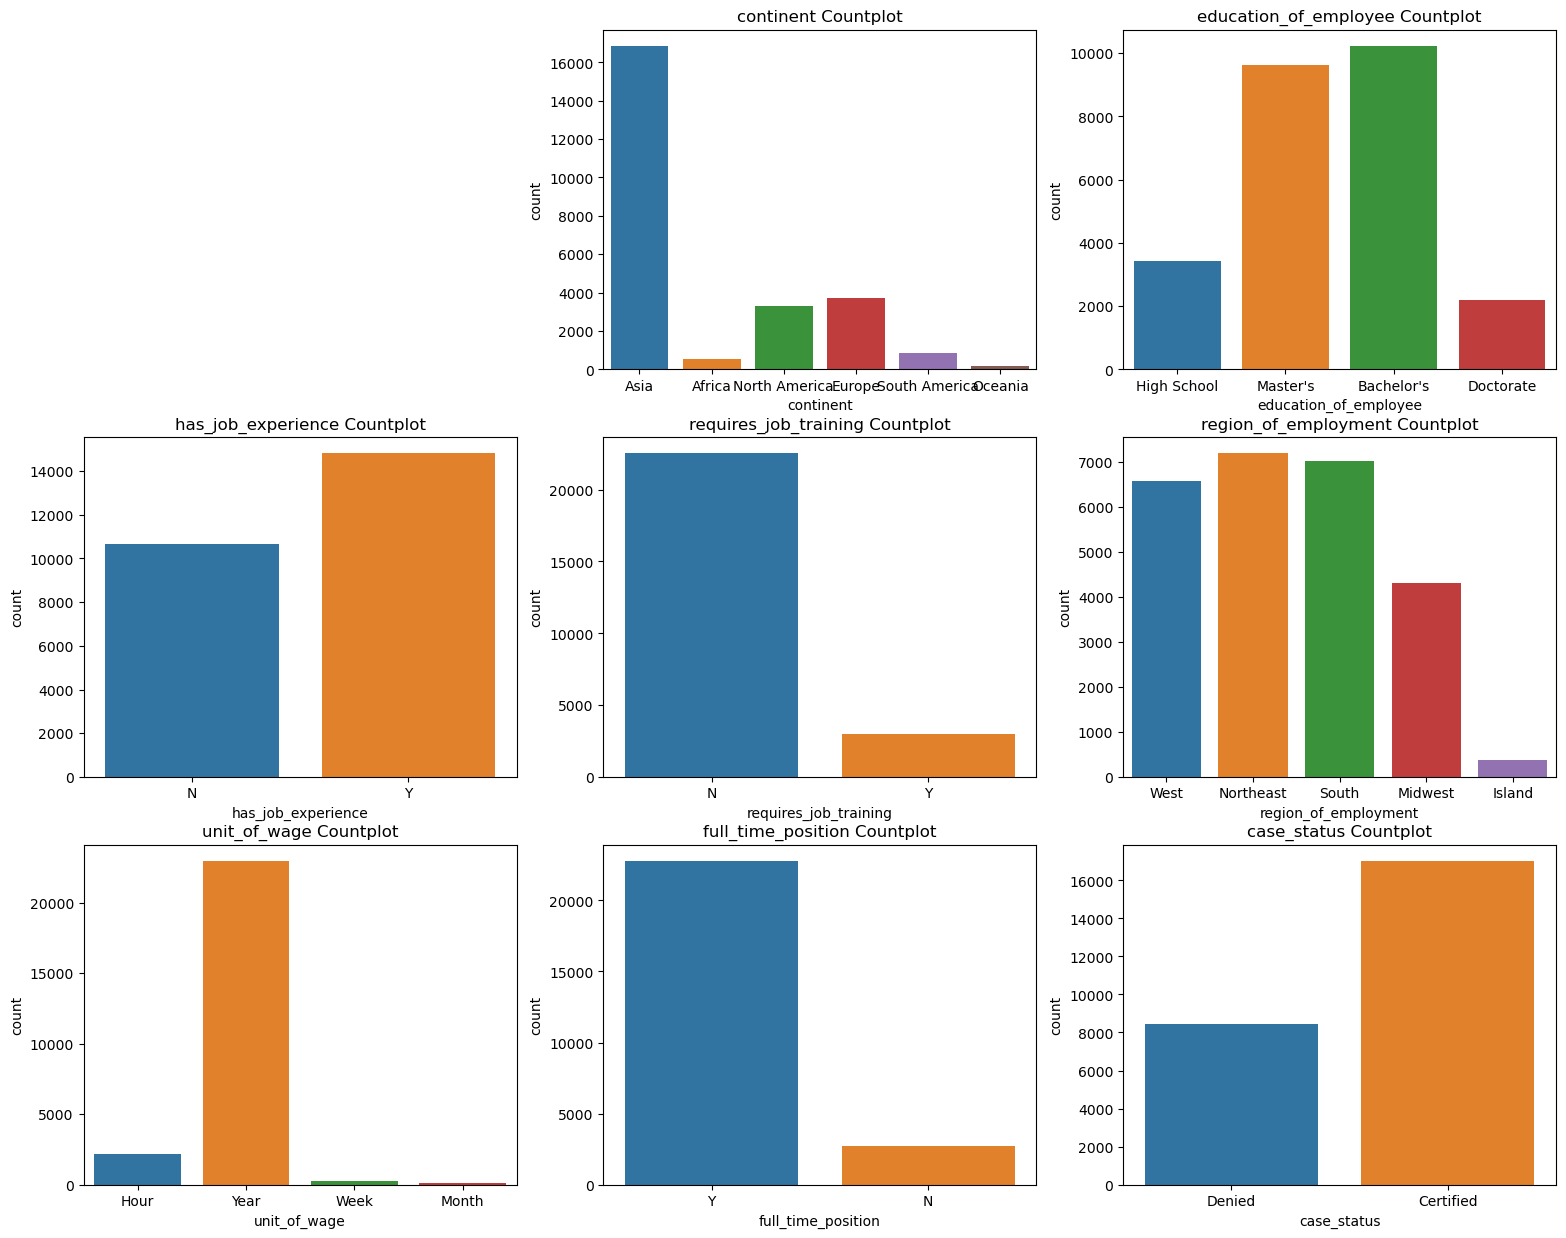

In [95]:
# Plot plots for all categorical columns

cat_cols = visa_df.select_dtypes(include='object').columns
plt.figure(figsize=(19,15))
for i in range(1,len(cat_cols)):
    plt.subplot(3,3,i+1)
    sbn.countplot(x=cat_cols[i],data = visa_df)
    plt.title(cat_cols[i]+" Countplot")
plt.show()

#### Method 3

- 

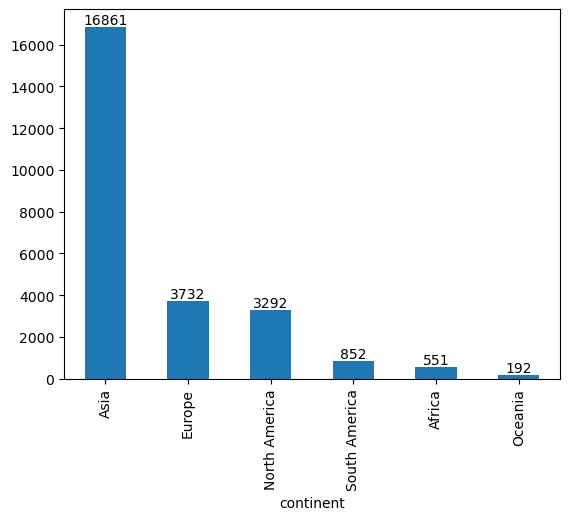

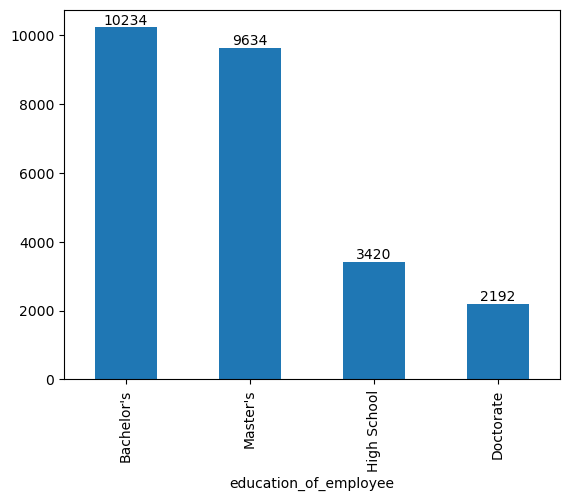

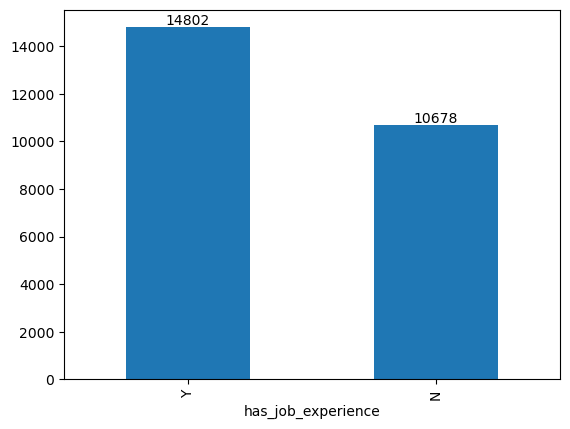

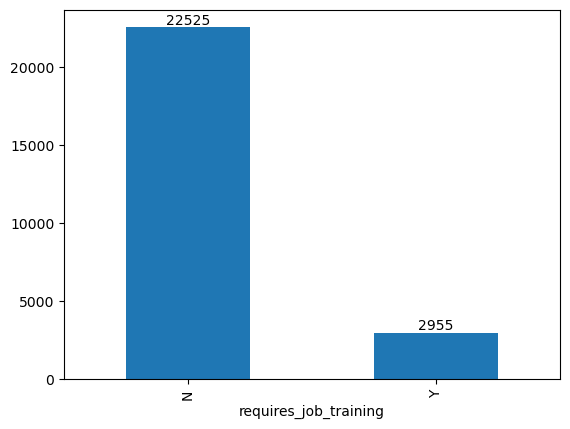

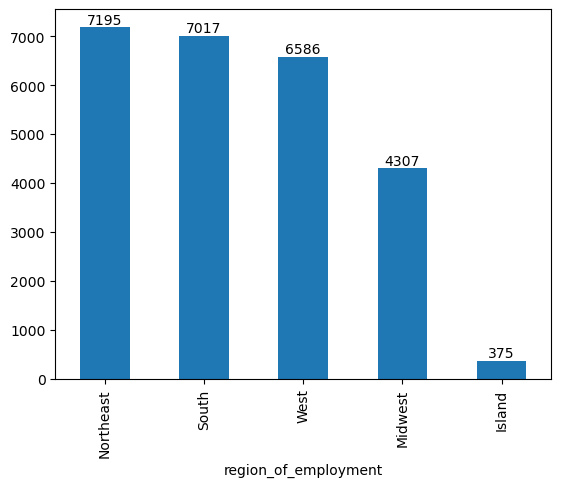

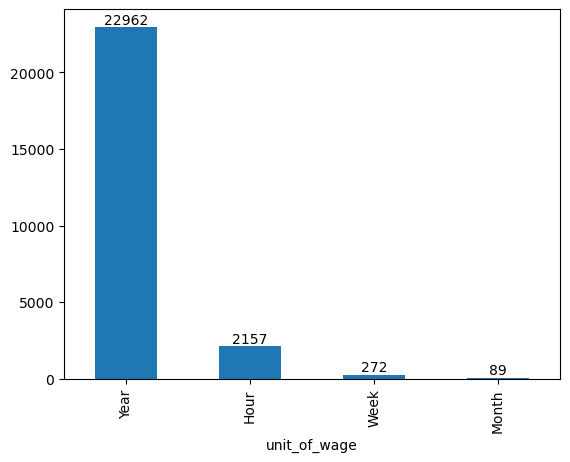

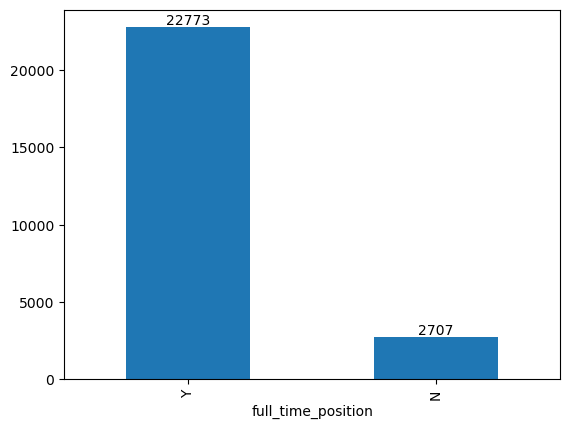

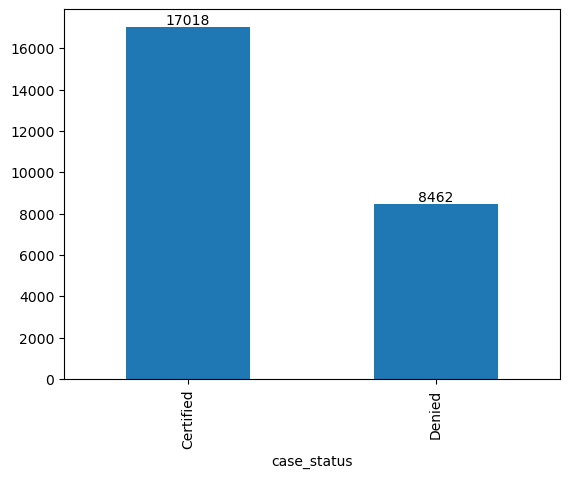

In [32]:
cat_cols = visa_df.select_dtypes(include='object').columns
num_cols = visa_df.select_dtypes(exclude='object').columns

# Apply the value counts for Categorical and Numeriacl columns

for i in cat_cols[1:]:
    cat_cols_df = visa_df[i].value_counts()    
    cat_cols_bar = cat_cols_df.plot(kind='bar')    
    cat_cols_bar.bar_label(cat_cols_bar.containers[0])
    plt.show()

# for i in num_cols:
#     num_col_df = visa_df[i].value_counts()
#     num_col_bar = num_col_df.plot(kind='bar')
#     num_col_bar.bar_label(num_col_bar.containers[0])
# plt.show()

### All 3 methods of plots:

- 1. matplot
     - plt.bar('Continent',     # x- axis (width)
        'Number of Applicants',  # y-axis (height)
        data=continent_df        # DataFrame name
       )
    plt.title("Bar chart")
    plt.xlabel("Continent")
    plt.ylabel("No of Applicants")
    plt.show() 
#################################################### 
- 2. seaborn
     - sbn.countplot(
        x= 'case_status',
        data = visa_df
        )
       
####################################################  
- 3. barplot
     - cat_cols_df = visa_df['Continent'].value_counts()    
        cat_cols_bar = cat_cols_df.plot(kind='bar')    
        cat_cols_bar.bar_label(cat_cols_bar.containers[0])
        plt.show()

#### Piechart

- It is under matlotlib package
- It will take keys and values (from .value_count())
  

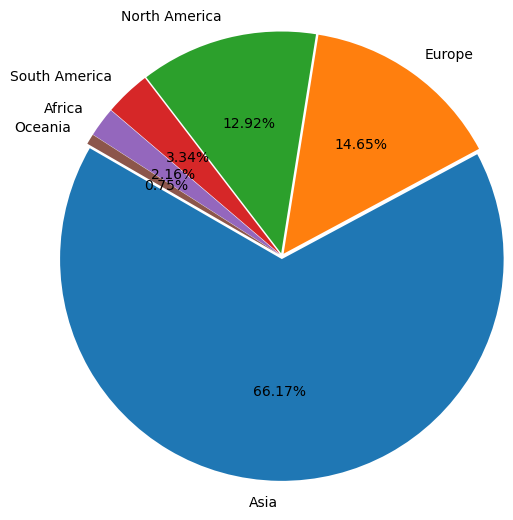

In [60]:
# Step1: Get keys from 'Continent' value_counts
# Step2: Get values from 'Continent' value_counts
# Step3: plt.pie verify the arguments


cont_keys = visa_df['continent'].value_counts().keys()
cont_values = visa_df['continent'].value_counts().values
plt.pie(cont_values,     # array *x*.  The fractional area of each wedge is given by ``x/sum(x)``
        labels=cont_keys,
        autopct="%0.2f%%",     # a string or function used to label the wedges with their numeric value. 
        explode= [0.02,0.02,0.02,0.02,0.02,0.02],  # specifies the fraction of the radius with which to offset each wedge.
        radius=1.5,   # The radius of the pie.
        startangle = 150,  # The angle by which the start of the pie is rotated, counterclockwise from the x-axis.
        data=cont_keys)
plt.show()

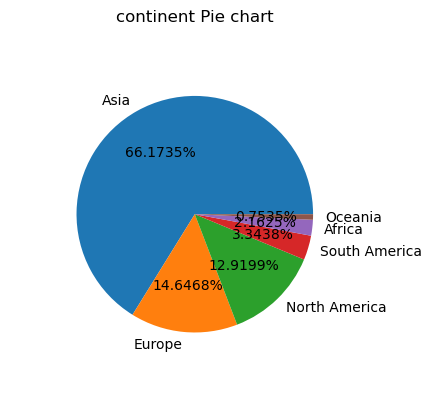

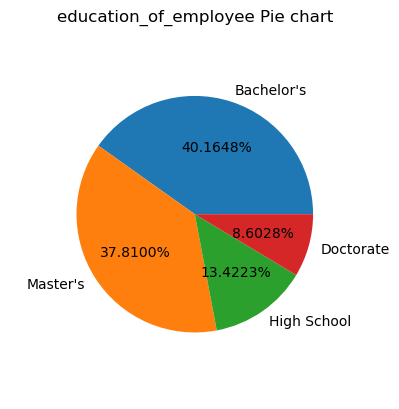

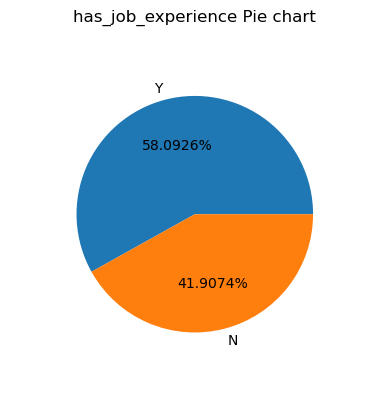

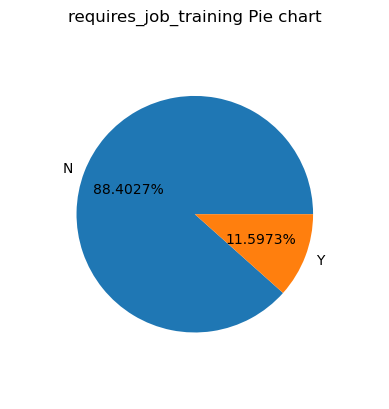

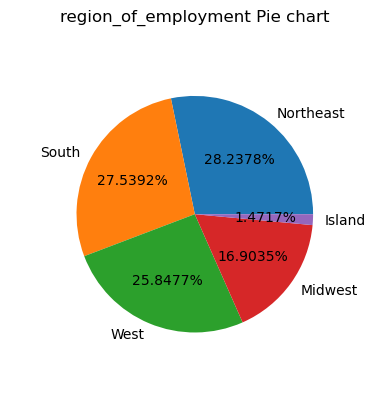

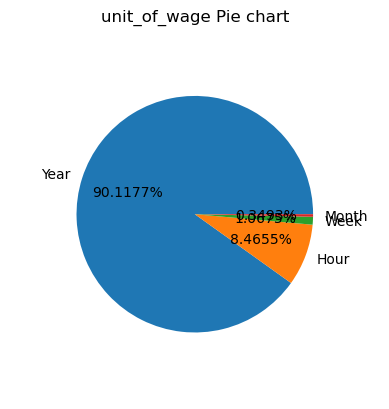

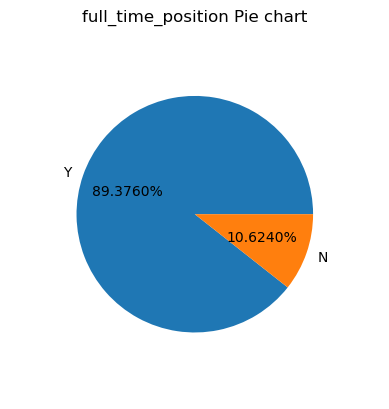

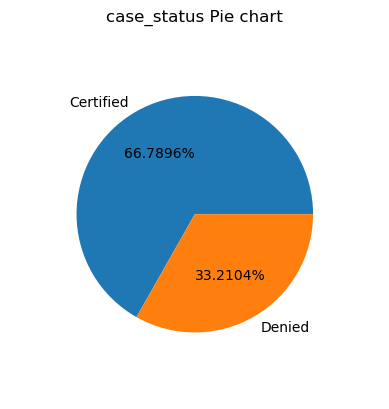

In [24]:
#  DRaw pie charts for all categorical columns
cat_cols = visa_df.select_dtypes(include='object').columns
for i in cat_cols[1:]:
    cat_col_keys = visa_df[i].value_counts().keys()
    cat_col_values = visa_df[i].value_counts().values    
    plt.pie(cat_col_values,
           labels=cat_col_keys,
            autopct="%0.4f%%",
            radius=0.8,
            data=cat_col_values
       )
    plt.title(i+" Pie chart")
    plt.show()